In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

PlayTennis = pd.read_csv('play_tennis.csv')
PlayTennis_copy = PlayTennis.copy()
PlayTennis

,outlook,humidity,windy,play
0,Sunny,High,Weak,No
1,Sunny,High,Strong,No
2,Overcast,High,Weak,Yes
3,Rain,High,Weak,Yes
4,Rain,Normal,Weak,Yes
5,Rain,Normal,Strong,No
6,Overcast,Normal,Strong,Yes
7,Sunny,High,Weak,No
8,Sunny,Normal,Weak,Yes
9,Rain,Normal,Weak,Yes


In [3]:
# encoding the categorical variables using LabelEncoder

Le = LabelEncoder()

PlayTennis['outlook'] = Le.fit_transform(PlayTennis['outlook'])
PlayTennis['humidity'] = Le.fit_transform(PlayTennis['humidity'])
PlayTennis['windy'] = Le.fit_transform(PlayTennis['windy'])
PlayTennis['play'] = Le.fit_transform(PlayTennis['play'])

In [4]:
PlayTennis

,outlook,humidity,windy,play
0,2,0,1,0
1,2,0,0,0
2,0,0,1,1
3,1,0,1,1
4,1,1,1,1
5,1,1,0,0
6,0,1,0,1
7,2,0,1,0
8,2,1,1,1
9,1,1,1,1


In [5]:
feature_cols = ['outlook', 'humidity','windy']
X = PlayTennis[feature_cols]
y = PlayTennis['play']


In [7]:
#Fitting the model

clf = tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X,y)
predictions = clf.predict(X)
print(metrics.accuracy_score(predictions,y))

0.8571428571428571


In [8]:
X_pred = clf.predict(X)
X_pred

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

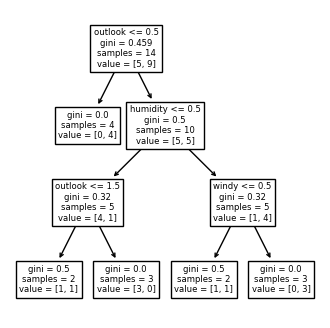

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
feature_cols = ['outlook', 'humidity','windy']

plt.figure(figsize=(4,4))
plot_tree(clf, feature_names=feature_cols)
plt.show()

In [12]:
from sklearn.metrics import confusion_matrix


In [13]:
print(confusion_matrix(predictions,y))

[[4 1]
 [1 8]]


In [14]:
clf.predict([[2,0,1]])

array([0])

In [16]:
clf.predict([[0,0,1]])

array([1])

In [17]:
clf.predict([[1,0,1]])

array([0])

In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [20]:
from sklearn.model_selection import GridSearchCV

params= {
    'criterion':['gini','entropy','log_loss'],
    'max_depth':range(2,15)
}

dt = tree.DecisionTreeClassifier()
grid = GridSearchCV(estimator=dt,param_grid=params)
grid.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 15)})

In [21]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [22]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [23]:
grid.best_score_

0.8666666666666666